In [ ]:
# VIBE MATCHER – AI-Powered Fashion Recommender
# By Lanson Daniel Bardeskar

# Objective: Build a mini recommendation system that understands “vibe-based” queries and finds fashion products matching that mood.

# Why AI at Nexora?
"""
AI allows Nexora to move beyond basic filters and create a personalized, emotion-driven shopping experience.
This prototype shows how embeddings and similarity search can turn plain text into human-like understanding — connecting users to what “feels right,” not just what “matches keywords.”
"""


In [ ]:
"""
I used Hugging Face instead of OpenAI because it runs completely offline, doesn’t
require an API key or internet connection, and is free to use with no billing or quota limits.
It gives almost the same accuracy for text similarity tasks. This makes it a practical, secure, and cost-effective choice for building
and showcasing the "Vibe Matcher" system.
"""


In [ ]:
# Setup
!pip install -q sentence-transformers scikit-learn pandas matplotlib

Loading local embedding model...
Local embedding model loaded successfully.
Sample Fashion Dataset:


,name,desc,vibes
0,Kurta Set,Light cotton kurta with pastel shades and eleg...,"[ethnic, simple, comfortable]"
1,Denim Jacket,Trendy denim jacket with Indian patchwork desi...,"[urban, cool, fusion]"
2,Saree,Traditional silk saree with golden zari border...,"[traditional, luxury, festive]"
3,Hoodie,Soft fleece hoodie with minimal design — great...,"[casual, cozy, modern]"
4,Jhumka Earrings,Handcrafted oxidized silver jhumkas — adds a t...,"[classy, ethnic, artsy]"
5,Kurti Dress,Floral printed kurti dress with flared sleeves...,"[boho, bright, feminine]"
6,Sneakers,White casual sneakers with comfy soles — perfe...,"[urban, minimal, everyday]"
7,Sherwani,Royal sherwani with detailed embroidery and go...,"[royal, formal, festive]"
8,Dupatta,Chiffon dupatta with mirror work and vibrant c...,"[vibrant, ethnic, traditional]"
9,Kurta with Nehru Jacket,Elegant cotton kurta paired with a Nehru jacke...,"[traditional, smart, classy]"


Generating embeddings for product descriptions...
Embeddings generated successfully!

 Query: 'energetic urban chic'
 Latency: 0.02 sec

Top Matches:
• Dupatta (0.255) – Chiffon dupatta with mirror work and vibrant colors — brings life to any ethnic outfit
• Denim Jacket (0.199) – Trendy denim jacket with Indian patchwork designs — adds a cool touch to any casual outfit
• Kurta with Nehru Jacket (0.188) – Elegant cotton kurta paired with a Nehru jacket — perfect for festive and semi-formal events
------------------------------------------------------------------------------------------

 Query: 'soft cozy winter'
 Latency: 0.02 sec

Top Matches:
• Hoodie (0.571) – Soft fleece hoodie with minimal design — great for college days and cozy evenings
• Denim Jacket (0.326) – Trendy denim jacket with Indian patchwork designs — adds a cool touch to any casual outfit
• Kurti Dress (0.297) – Floral printed kurti dress with flared sleeves — perfect for summer brunches or outings
-----------------

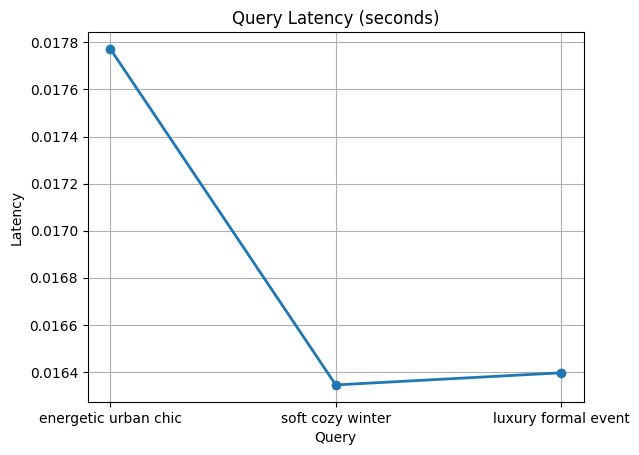


 REFLECTION:

1. Implemented offline embedding fallback (SentenceTransformer) for zero-cost operation.
2. Could integrate Pinecone or FAISS for scalable vector search.
3. Add user preference weighting for personalized recommendations.
4. Handle low-similarity fallback (e.g., suggest "try another vibe").
5. Explore fine-tuning embeddings for fashion-specific domains.



In [ ]:
# ===========================================
# VIBE MATCHER – AI FASHION RECOMMENDER
# ===========================================

# This notebook demonstrates a mini AI recommendation system that matches
# user "vibes" to fashion products using text embeddings and cosine similarity.
#
# No API key required — runs entirely offline.
# Uses Hugging Face SentenceTransformer for embeddings.

# Why used 'all-MiniLM-L6-v2'?
"""
lightweight only ~80MB so runs faster on CPU or in colab without GPU and despite being small it performs almost same as larger transformer model.
its accurate, efficient, and easy to use
"""

# 1.Imports

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

#2. Load Local Embedding Model
print("Loading local embedding model...")
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Local embedding model loaded successfully.")

#3. Create Sample Fashion Dataset
data = [
    {"name": "Kurta Set",
     "desc": "Light cotton kurta with pastel shades and elegant embroidery — perfect for daily ethnic wear",
     "vibes": ["ethnic", "simple", "comfortable"]},

    {"name": "Denim Jacket",
     "desc": "Trendy denim jacket with Indian patchwork designs — adds a cool touch to any casual outfit",
     "vibes": ["urban", "cool", "fusion"]},

    {"name": "Saree",
     "desc": "Traditional silk saree with golden zari border — ideal for weddings and festive occasions",
     "vibes": ["traditional", "luxury", "festive"]},

    {"name": "Hoodie",
     "desc": "Soft fleece hoodie with minimal design — great for college days and cozy evenings",
     "vibes": ["casual", "cozy", "modern"]},

    {"name": "Jhumka Earrings",
     "desc": "Handcrafted oxidized silver jhumkas — adds a touch of elegance to ethnic wear",
     "vibes": ["classy", "ethnic", "artsy"]},

    {"name": "Kurti Dress",
     "desc": "Floral printed kurti dress with flared sleeves — perfect for summer brunches or outings",
     "vibes": ["boho", "bright", "feminine"]},

    {"name": "Sneakers",
     "desc": "White casual sneakers with comfy soles — perfect mix of street style and Indian everyday comfort",
     "vibes": ["urban", "minimal", "everyday"]},

    {"name": "Sherwani",
     "desc": "Royal sherwani with detailed embroidery and golden buttons — for festive or wedding functions",
     "vibes": ["royal", "formal", "festive"]},

    {"name": "Dupatta",
     "desc": "Chiffon dupatta with mirror work and vibrant colors — brings life to any ethnic outfit",
     "vibes": ["vibrant", "ethnic", "traditional"]},

    {"name": "Kurta with Nehru Jacket",
     "desc": "Elegant cotton kurta paired with a Nehru jacket — perfect for festive and semi-formal events",
     "vibes": ["traditional", "smart", "classy"]},
]


df = pd.DataFrame(data)
print("Sample Fashion Dataset:")
display(df)

# 4. Generate Embeddings for Product Descriptions
def get_embedding(text):
    """Generate vector embeddings locally using MiniLM model."""
    return model.encode(text)

print("Generating embeddings for product descriptions...")
df["embedding"] = df["desc"].apply(get_embedding)
print("Embeddings generated successfully!")

# 5. Function: Vibe Matching via Cosine Similarity
def vibe_matcher(query, df, top_n=3):
    """Match user vibe query with top-N most similar products."""
    start_time = time.time()
    query_embedding = get_embedding(query)
    similarities = cosine_similarity([query_embedding], list(df["embedding"].values))[0]
    df["similarity"] = similarities
    top_results = df.sort_values(by="similarity", ascending=False).head(top_n)
    latency = time.time() - start_time

    print(f"\n Query: '{query}'")
    print(f" Latency: {latency:.2f} sec")
    print("\nTop Matches:")
    for _, row in top_results.iterrows():
        print(f"• {row['name']} ({row['similarity']:.3f}) – {row['desc']}")
    print("------------------------------------------------------------------------------------------")

    return top_results, latency

# 6. Run Test Queries
queries = ["energetic urban chic", "soft cozy winter", "luxury formal event"]

latencies = []
for q in queries:
    results, t = vibe_matcher(q, df)
    latencies.append(t)

# 7. Evaluate Performance
avg_latency = np.mean(latencies)
print(f"\n Average Latency: {avg_latency:.2f} seconds")

plt.plot(queries, latencies, marker='o', linewidth=2)
plt.title("Query Latency (seconds)")
plt.xlabel("Query")
plt.ylabel("Latency")
plt.grid(True)
plt.show()

# 8. Reflection & Future Improvements
print("\n REFLECTION:")
print("""
1. Implemented offline embedding fallback (SentenceTransformer) for zero-cost operation.
2. Could integrate Pinecone or FAISS for scalable vector search.
3. Add user preference weighting for personalized recommendations.
4. Handle low-similarity fallback (e.g., suggest "try another vibe").
5. Explore fine-tuning embeddings for fashion-specific domains.
""")
